# scatterplots, density plots and hexagonal binning


base code from: 

https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density
 

In [3]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

In [4]:
# generate data points
n_points=500
random_state = 123456
random_points_generator=np.random.RandomState(100) #set random seed to ensure reproducibility
data = random_points_generator.multivariate_normal([0, 0], [[1, 0.6], [0.5, 3]], n_points)
x, y = data.T

<ipython-input-4-167b85506e6d>:5: RuntimeWarning: covariance is not positive-semidefinite.
  data = random_points_generator.multivariate_normal([0, 0], [[1, 0.6], [0.5, 3]], n_points)


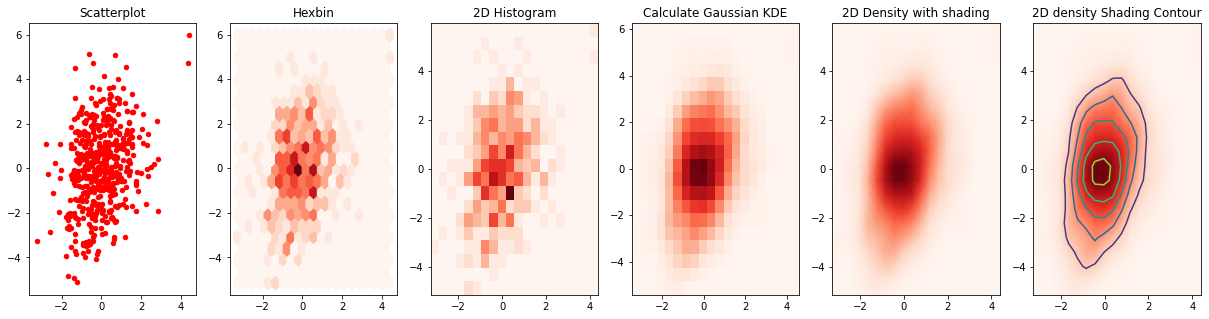

In [5]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))

#choose a color map
#colors=plt.cm.BuGn_r
colors=plt.cm.Reds
 
# Scatterplot
axes[0].set_title('Scatterplot')
axes[0].scatter(x, y, s=20, color="red")
 
# interpolation with hexagonal bins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=colors)

 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=colors)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=colors)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=colors)

# contour
axes[5].set_title('2D density Shading Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=colors)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

0.0021246055302815777 0.08025986503730491


(array([81., 27., 20., 14., 12., 10.,  8.,  4.,  7.,  6.]),
 array([0.00212461, 0.00993813, 0.01775166, 0.02556518, 0.03337871,
        0.04119224, 0.04900576, 0.05681929, 0.06463281, 0.07244634,
        0.08025987]),
 <BarContainer object of 10 artists>)

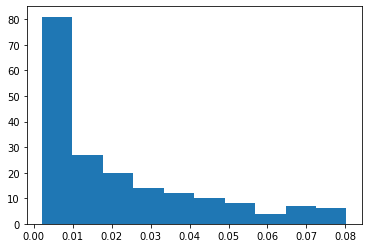

In [7]:
data_to_plot = zi.reshape(xi.shape)
tmp = np.reshape(data_to_plot,-1) / np.mean(data_to_plot)
threshold = .2
data_to_plot = np.ma.masked_array(data_to_plot, tmp <threshold)
print(np.min(data_to_plot), np.max(data_to_plot))
plt.hist(np.reshape(data_to_plot, -1))

<ipython-input-86-8917eb7e6a25>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes.pcolormesh(xi, yi, data_to_plot,  cmap="RdYlBu")#, vmin=0.005, vmax=10)


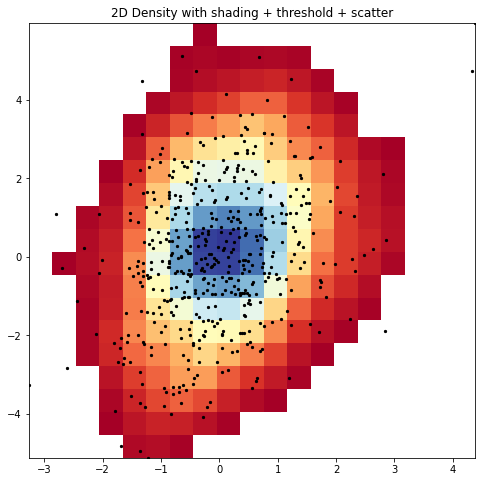

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
axes.pcolormesh(xi, yi, data_to_plot,  cmap="RdYlBu")#, vmin=0.005, vmax=10)
axes.set_title('2D Density with shading + threshold + scatter' )
axes.scatter(x, y, s=5, color="black")

In [ ]:
import pandas as pd
df=pd.read_csv(r'./data/2021_dim.csv', sep="|")
df
plt.hist2d(x, y, bins=100)


,Unnamed: 0,anno,mese,a_c,CF_ok,az_ragione_soc,data,data_fine,data_fine_prev,data_inizio,...,tipo_orario,saldo,sede_op_ateco,sede_op_comune,sede_op_indirizzo,sede_op_provincia,sigla_prov,codice_istat,SLL_codice,id_impresa
0,10023,2021,7,True,02251000309,FAMILIA S.R.L.,2021-07-01,n.d.,2021-10-31,2021-07-01,...,TEMPO PARZIALE ORIZZONTALE,1,78.10.00,MONFALCONE,"Viale San Marco, 14",Gorizia,GO,31012,608,34642
1,10024,2021,9,True,02251000309,FAMILIA S.R.L.,2021-09-29,n.d.,2021-12-15,2021-09-29,...,TEMPO PARZIALE ORIZZONTALE,1,78.10.00,MONFALCONE,"Viale San Marco, 14",Gorizia,GO,31012,608,34642
2,10025,2021,4,True,02251000309,FAMILIA S.R.L.,2021-04-09,n.d.,2021-09-30,2021-04-09,...,TEMPO PARZIALE ORIZZONTALE,1,78.10.00,MONFALCONE,"Viale San Marco, 14",Gorizia,GO,31012,608,34642
3,10026,2021,4,True,02251000309,FAMILIA S.R.L.,2021-04-20,2021-07-31,2021-07-31,2021-04-20,...,TEMPO PARZIALE ORIZZONTALE,1,78.10.00,MONFALCONE,"Viale San Marco, 14",Gorizia,GO,31012,608,34642
4,10027,2021,7,True,02251000309,FAMILIA S.R.L.,2021-07-02,2021-08-20,2021-08-20,2021-07-02,...,TEMPO PARZIALE ORIZZONTALE,1,78.10.00,MONFALCONE,"Viale San Marco, 14",Gorizia,GO,31012,608,34642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237007,2216879,2021,1,False,00074940933,CIDA SRL,2021-01-31,2021-01-31,n.d.,1992-04-06,...,TEMPO PIENO,-1,46.75.02,ZOPPOLA,VIA CUSANO 9,Pordenone,PN,93051,611,528
237008,2216880,2021,6,False,MRSLCU68B22I403H,MORAS LUCA,2021-06-18,2021-06-18,n.d.,2013-10-01,...,TEMPO PIENO,-1,43.33.00,ZOPPOLA,VIA TRENTO 41/1,Pordenone,PN,93051,611,81373
237009,2216881,2021,8,False,03033900303,S.C.I. DI GIANANTONIO VALENTINO SDF,2021-08-31,2021-08-31,n.d.,2018-03-01,...,TEMPO PIENO,-1,41.20.00,TRASAGHIS,"VIA FONTANA, 4/B",Udine,UD,30124,606,46375
237010,2216882,2021,8,False,03033900303,S.C.I. DI GIANANTONIO VALENTINO SDF,2021-08-31,2021-08-31,n.d.,2000-01-24,...,TEMPO PIENO,-1,41.20.00,TRASAGHIS,"VIA FONTANA, 4/B",Udine,UD,30124,606,46375
